# Application of Machine Learning in Computer Vision

## Introduction

Machine Learning (ML) is the art of solving a computation problem using a computer without an explicit program. ML is so pervasive today that various ML applications such as image recognition, stock trading, email spam detection, product recommendation, medical diagnosis, predictive maintenance, cybersecurity, etc. are constantly used by organizations around us and probably sometimes without our awareness.

## Digit Recognizer ML Model

Adapted from [scikit-learn.org examples]

[scikit-learn.org examples]: https://scikit-learn.org/stable/auto_examples/index.html

## Problem

Recognizing hand-written digit images so that they can be converted to numbers (in the format a computing system could use) and be easily processed by automated systems, e.g. hand written zip codes on letters (snail mail) for sorting letters according to zip codes for faster and cheaper processing.

### Problem Notes:

Possibly there will be a camera capturing images of envelope faces one by one, and a computer program to extract sections of digit images from these camera images to be used in the computing pipeline.
Our job as machine learning model developer is to pre-process the captured dataset (i.e. segmented pictures of hand written digit images), apply ML algorithms, and evaluate and verify the performance of the developed model meets the performance goals.

## Proposed solution:

**Supervised-learning** zip code digit images from a proper dataset.
1. Take digital snapshots of letter faces
2. Locate zip codes in images
3. Sement images to find each digit
4. Convert (i.e. scale, stretch, etc.) each digit image to 8x8 images as feature vectors
5. Label the training image set by subject matter human experts for ground truth
6. Pass the labeled training image dataset to a classifier to train a model

Steps (1.) to (5.) above are data preparation stage. Once the model is generated (i.e. trained), feature vectors extracted from **never-seen-before** data can be **tested** to **predict** these new digit images. This new data is called testing dataset.

The labels used by human experts to mark the training dataset would be the **category**, or class, or group that a digit image would belong to. The category is also similar to a **feature** given by the dataset for classification (in this example it is not obvious). To make a distinction between the data set feature (a column in the training dataset matrix) and the group feature we want to find out for a new data point, we call it a **category** or a class. Here the prediction is finding out (with or without a score or a probability) which category the new data point would belong to.

## Import open-source libraries 
Open source libraries such as NumpPy, SciPy, matplotlib, scikit-learn are developed and maintained by tens of thousands of developers, researchers, engineers from various organizations like universities and industry.

### APIs
[numpy] [scikit-learn]

[scikit-learn]: https://scikit-learn.org/stable/modules/classes.html
[numpy]: https://docs.scipy.org/doc/numpy/reference/

### Why do we use Python in this course?

Because Python is taking over as the number 1 data science programming language ([reference])

[reference]: https://opensource.com/article/18/5/numbers-python-community-trends

In [1]:
# Standard scientific Python imports
%matplotlib inline
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

## Real-world Dataset

The library sklearn (short proxy for scikit-learn) includes several datasets to give the opportunity to users for a data science quick-start. In the following notebook cells,the digit data set is used to train a classifier model. These digit images are from MNIST dataset collected 20 years ago from actual hand-written letters to automate USPS zip code sorting.

In [2]:
# The digits dataset for training
digits = datasets.load_digits()

# The data is made of 8x8 images of digits
# zip the image and label (dependent variable) together
images_and_labels = list(zip(digits.images, digits.target))

Let's examine the problem dataset to gain insight. This step is crucial as the model developer (i.e. data scientist) will have better understanding of the data set to solve the problem. Many questions will be answered towards using the right features, doing the right **feature engineering**, picking the right learning model, and avoiding bugs, etc. The representation of the dataset might not conform to what the developer might expect. Example, what is the computer representation of the data set? A matrix? Which data structure? A row of a matrix is a data point? Are ground truth labels in this matrix? Do we have missing data? What about outliers? Which features are **numerical** and which are **nominal** and which are neither?

**Question:** What is the number format of the data? Integer? Floating point? Long? Double?

In [3]:
print(f'Number of images in the training set, N= {len(images_and_labels)}')

Number of images in the training set, N= 1797


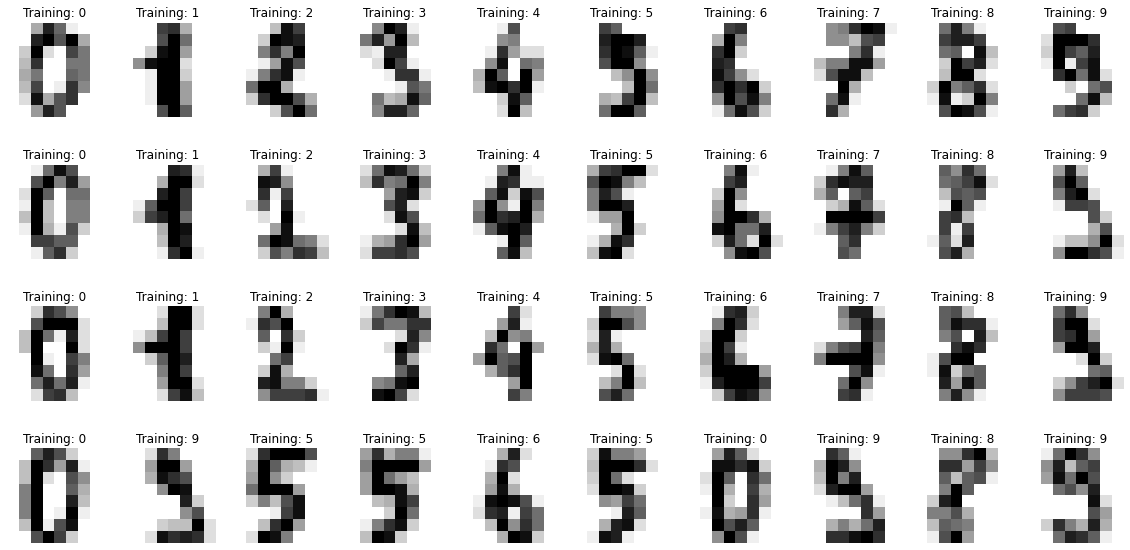

In [4]:
# Draw the first 40 data points - in this case images
plt.figure(1, figsize=(20, 10))
for index, (image, label) in enumerate(images_and_labels[:40]):
    plt.subplot(4, 10, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Training: {label}')

In [5]:
# Check how the data looks like, examine the label as the last element
print(images_and_labels[0])
print(images_and_labels[1])

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), 0)
(array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]), 1)


In [6]:
# Check the size of the data vectors, examine the indices
print(len(images_and_labels))
print(len(images_and_labels[0]))
print(len(images_and_labels[0][0]))
print(len(images_and_labels[0][0][0]))

1797
2
8
8


**Question:** Above numbers make sense?

## Pre-processing the dataset

Most of the times the data pre-processing stage takes bulk of the data science task.
Pre-processing includes correcting number formats, setting ranges, converting feature types, checking for erroneous input (e.g. February 31, 2119), erroneous data entry (e.g. 5 year old child with a Ph.D. degree), cleaning outliers that can throw off the model, **imputing** missing values for robust model generation, etc.

Once a reasonable, good, sufficient (all of these properties are clearly subjective) data set is achieved, then the learning stage is a short script or pressing a few buttons in a program in the data science platform we use, such as Weka (source: https://www.cs.waikato.ac.nz/~ml/weka/index.html) or a Python pipeline using `sklearn`.

Data reduction, feature engineering or feature selection process is within or overlapping with the pre-processing stage. Reducing data helps generation of robust models with high **generalization** ability.

### The Pitfall 

Any error made in the input dataset will be reflected on the generated model and test set outputs (i.e. predictions). In data science, it is very easy to trick ourselves about a model performance by committing data errors during preparation of the data.

In [7]:
# To apply a classifier on this data, we need to flatten the image
# Turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(f'N={len(data)}, M={len(data[0])}')

N=1797, M=64


---

## Classification with Support Vector Machine Classifier

Support Vector Machines (SVM) were very popular machine learning methods (algorithms) which gained popularity a lot over Artificial Neural Networks (ANN) before the deep learning time has begun. There are a few advantages and disadvantages between them:

* Early ANN methods were mostly heuristic, trial-and-error approaches, where SVM has a sound theory
* ANN minimizes empirical risk (or cost), SVM minimizes structural risk (maximizes the margin between the data points and the discriminating hyperplane)
* If done right, both ANN and SVM would generate identical decision surfaces after successful training stages
* SVM solves the problem by finding the optimum solution (solving a real convex optimization problem – because the algorithm sets up the problem accordingly) while ANN looks for a solution with gradient descent optimization algorithm. Literally, ANN fits a hypersurface (decision surface) to the data and that is why ANN are also called function approximators.
* Local minima is problem for ANN classifiers, since the optimization is greedy
* Setting the network structure is a problem of ANN model development
* Selection of a suitable kernel and its parameters is a problem of SVM model development
* SVM has very high generalization ability and automatically sets the model size (with support vectors)

In the following cell SVM is picked as the classifier for the digit recognition problem. Prediction stage will generate the class labels the model predicts for the new (never-seen-before) test data input.



In [8]:
# Create a classifier: a support vector classifier
# gamma is normally determined using a hyperparameter search which would need a validation dataset
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits - 50% data is used as the training set
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

Note that the above model is stored in the `classifier` object.

## Evaluate the Classifier Model

Once the classification model (i.e. trained model generated by the learning SVM program) an evaluation has to be conducted to measure the model performance.

A natural metric: The ratio of the number of data points the model predicts correct over the total number of data points.

A𝚌𝚌𝚞𝚛𝚊𝚌𝚢 = 𝚗𝚞𝚖𝚋𝚎𝚛 𝚘𝚏 𝚌𝚘𝚛𝚛𝚎𝚌𝚝 𝚙𝚛𝚎𝚍𝚒𝚌𝚝𝚒𝚘𝚗𝚜 / 𝚗𝚞𝚖𝚋𝚎𝚛 𝚘𝚏 𝚝𝚘𝚝𝚊𝚕 𝚙𝚛𝚎𝚍𝚒𝚌𝚝𝚒𝚘𝚗𝚜

When many categories are involved as in the above example (there are 10 classes - digits from zero to nine), a **confusion matrix** is used to present the accuracy. Each column shows predicted class and each row shows actual. An ideal confusion matrix is all 100% in all diagonal elements, and zeros everywhere except for the diagonal.

An **unbalanced** machine learning problem has one class much larger than the other(s).

Consider an unbalanced problem (such as patient cancer prediction in healthcare), then Accuracy is not the best metric but rather, F1-score and similar metrics must be used.

**Reclassification** is defined as using the entire training dataset as the testing dataset after the model is trained.

We should not just train the model on the entire dataset, test on the entire dataset and report how many predicted correctly over the total number data point.
However note that reclassification performance can be used as a metric to indicate model **overfitting.**

**Question:** Can we report the reclassification performance as our model performance?

A right way of training, testing and evaluating an ML model requires the following generic stages:

* Divide the dataset in a non-overlapping fashion for training set, testing set and validation set
* Use training dataset to develop, generate the model
* Use validation dataset to tune model hyperparameters (e.g. Radial Basis Function gamma parameter of an SVM)
* Use test dataset to measure the probable real-world performance of the model

**Question:** How would one deploy the generated ML model? Such as the trained as in the above?

In [9]:
print(f'Classification report for classifier {classifier}:\n{metrics.accuracy_score(expected, predicted)}\n')

Classification report for classifier SVC(gamma=0.001):
0.9688542825361512



The confusion matrix below shows the prediction versus actual (dataset labels) on matrix where the rows are actual and columns are predicted classes. Since we have 10 classes in the MNIST digit dataset (for each digit), the matrix is  10×10 . As can be seen, very few testing data points are confused with other classes.

In [10]:
print(f'Confusion matrix:\n{metrics.confusion_matrix(expected, predicted)}')

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


Let's see some example predictions:

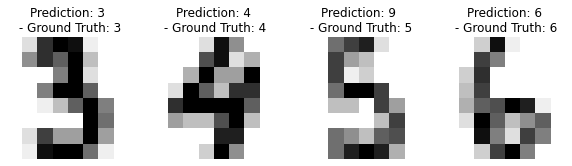

In [11]:
# Change the indices in images_and_predictions below to see more predictions
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
plt.figure(1, figsize=(10, 10))
for index, (image, prediction) in enumerate(images_and_predictions[30:34]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Prediction: {prediction}\n - Ground Truth: {expected[index+30]}')
#
plt.show()

At this point, model development pipeline and performance evaluation is completed.